In [1]:
import kaggle as kg
import pandas as pd
import numpy as np
import os            #we can use shotil too
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
import pickle
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## In the cell above 

In [2]:
os.environ["USERNAME"] = "bhoomijain012"
os.environ["KEY"] = "6f61094e7869c13a95742fdc3ab3afdf"

In [3]:
kg.api.authenticate

<bound method KaggleApi.authenticate of <kaggle.api.kaggle_api_extended.KaggleApi object at 0x7f62b3ad8490>>

In [33]:
kg.api.dataset_download_files(dataset="ehtishamsadiq/uncleaned-laptop-price-dataset", path="./dataset", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset


In [4]:
data = pd.read_csv("dataset/laptopData.csv")

In [5]:
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
data.drop(labels=data.columns[0],axis=1, inplace=True)  # deleated unnnecesary column (column0) 
#inplace if true then itll delete the data from main data but if false then itll delete data from its copy. bydefault it is false.

In [ ]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [9]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
data.columns[0]

'Company'

In [11]:
data[data.columns[0]]  #unique used for find how many companies laptop are in first column

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [12]:
data[data.columns[0]].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', nan, 'Chuwi',
       'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
data.isna().sum() #check if there is any nominal(nan) value

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [14]:
data.dropna(axis=0, inplace=True) # removed the rows with nominal (nan) name(nan is the information which we dont have like free space, it also means missing data)

In [15]:
data.shape

(1273, 11)

In [16]:
data.isna().sum() # to check if still is nominal (nan) value 
# isna is used for detection 
# # sum returns the value
#this data is EDA ( Exploratory data analysis)

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [17]:
data[data.columns[0]].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [18]:
data[data.columns[0]].unique().shape # found how many companies

(19,)

In [19]:
#data.duplicated().sum() # found duplicated values

In [ ]:
data[data.columns[0]].unique()    #return list of unique values

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [21]:
def label_encode_column (column_name):
    data[column_name].unique()

    d = dict()
    for value in data[column_name].unique(): #value is the name of the company
        d[value] = data[data[column_name]==value][data.columns[-1]].mean() #will find the mean price of the one company laptop

    input_target_df = pd.DataFrame(data = {column_name: d.keys(),"Mean Price":d.values()}) # we made two columens now, one is column name another is mean price
    input_target_df.sort_values(by = "Mean Price",inplace=True) # it will sort the data on basis of mean price
    input_target_df.reset_index(inplace=True, drop=True)        # it will remove all old indexes (drop funcn is used bcz of it)

    data[column_name] = data[column_name].replace(to_replace = list(input_target_df[column_name]),
         value = list(input_target_df.index)).infer_objects(copy = False) # it will change the value name to number
    #inferobject is used to remove the warning from code
    # 
    return dict(zip(list(input_target_df[column_name]),list(input_target_df.index)))

In [22]:
#name = ['Company','TypeName','ScreenResolution','Memory','Gpu','OpSys'] or [0,1,4,5,7,8]
#for i in name:
 #    label_encode_column(i)           #THIS IS ALSO ONE WAY TO DO IT
#THE BELOW ONE IS BY SIR AND UPPER ONE IS BY ME 

categorical_columns = list(data.columns[0:2]) + list(data.columns[3:5])+list(data.columns[6:9])


In [23]:
categorical_columns

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [24]:
#for column_name in categorical_columns:
 #   label_encode_column(column_name)
columns_label_encodings = dict()

for column_name in categorical_columns:

    label_encoding_dict = label_encode_column(column_name)
    columns_label_encodings[column_name] = label_encoding_dict


/tmp/ipykernel_7483/3784164624.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column_name] = data[column_name].replace(to_replace = list(input_target_df[column_name]),


In [25]:

with open("columns_label_encodings.pkl","wb") as file_handle:
    pickle.dump(columns_label_encodings,file_handle)

In [26]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8GB,14,80,8,1.37kg,71378.6832
1,13,3,13.3,13,64,8GB,13,45,8,1.34kg,47895.5232
2,5,1,15.6,15,58,8GB,21,54,2,1.86kg,30636.0000
3,13,3,15.4,36,111,16GB,31,95,8,1.83kg,135195.3360
4,13,3,13.3,26,99,8GB,21,84,8,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4GB,14,47,4,1.8kg,33992.6400
1299,6,2,13.3,22,77,16GB,31,47,4,1.3kg,79866.7200
1300,6,1,14,4,16,2GB,6,6,4,1.5kg,12201.1200
1301,5,1,15.6,4,77,6GB,12,32,4,2.19kg,40705.9200


In [27]:
#float(data["Ram"].iloc[0].split("GB")[0])   #it is used to slipt the Gb from the 8GB(this is for one element the below one is for all column)
data["Ram"] = data["Ram"].apply(lambda x: (float(x.split("GB")[0])))

In [28]:
float (data["Weight"].iloc[0].split("kg")[0])

1.37

In [29]:
data[data["Weight"] == "?"]         # it is used for finding the row in which weight value is not given 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,9,3,13.3,15,72,8.0,21,59,4,?,77202.72


(array([397., 280., 125., 111.,  94.,  79.,  68.,  38.,  49.,  32.]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <BarContainer object of 10 artists>)

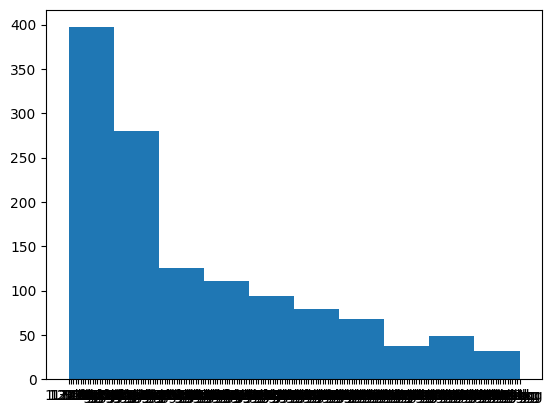

In [30]:
plt.hist(data["Weight"])     # used to plot but we plot  is because we need to fill that ? value in weight 
#so we need the distribution plotted, the plotted distribution is skewed so we will use mode

In [31]:
data["Weight"].value_counts()      # it is used to find the no. of diff laptops with weight (found mode exactly)

Weight
2.2kg      111
2.1kg       57
2.4kg       43
2.3kg       41
2.5kg       37
          ... 
3.52kg       1
2.21kg       1
2.191kg      1
2.34kg       1
4.0kg        1
Name: count, Length: 189, dtype: int64

In [32]:
data["Weight"].value_counts().index                     #for the index only

Index(['2.2kg', '2.1kg', '2.4kg', '2.3kg', '2.5kg', '2kg', '2.8kg', '1.2kg',
       '1.86kg', '1.4kg',
       ...
       '2.99kg', '2.75kg', '0.99kg', '4kg', '2.591kg', '3.52kg', '2.21kg',
       '2.191kg', '2.34kg', '4.0kg'],
      dtype='object', name='Weight', length=189)

In [33]:
data["Weight"].replace( to_replace="?",value = data["Weight"].value_counts().index[0],inplace=True)         #replaced the ? with 2.2kg

/tmp/ipykernel_7483/2910320245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Weight"].replace( to_replace="?",value = data["Weight"].value_counts().index[0],inplace=True)         #replaced the ? with 2.2kg


In [34]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8.0,14,80,8,1.37kg,71378.6832
1,13,3,13.3,13,64,8.0,13,45,8,1.34kg,47895.5232
2,5,1,15.6,15,58,8.0,21,54,2,1.86kg,30636.0000
3,13,3,15.4,36,111,16.0,31,95,8,1.83kg,135195.3360
4,13,3,13.3,26,99,8.0,21,84,8,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4.0,14,47,4,1.8kg,33992.6400
1299,6,2,13.3,22,77,16.0,31,47,4,1.3kg,79866.7200
1300,6,1,14,4,16,2.0,6,6,4,1.5kg,12201.1200
1301,5,1,15.6,4,77,6.0,12,32,4,2.19kg,40705.9200


In [35]:
data["Weight"] = data["Weight"].apply(lambda x: (float(x.split("kg")[0])))

In [36]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8.0,14,80,8,1.37,71378.6832
1,13,3,13.3,13,64,8.0,13,45,8,1.34,47895.5232
2,5,1,15.6,15,58,8.0,21,54,2,1.86,30636.0000
3,13,3,15.4,36,111,16.0,31,95,8,1.83,135195.3360
4,13,3,13.3,26,99,8.0,21,84,8,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4.0,14,47,4,1.80,33992.6400
1299,6,2,13.3,22,77,16.0,31,47,4,1.30,79866.7200
1300,6,1,14,4,16,2.0,6,6,4,1.50,12201.1200
1301,5,1,15.6,4,77,6.0,12,32,4,2.19,40705.9200


In [37]:
data[data["Inches"] == "?"] 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,9,5,?,15,94,8.0,21,93,4,1.78,128298.24


(array([805., 198., 205.,   3.,  37.,   9.,   3.,   3.,   5.,   5.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

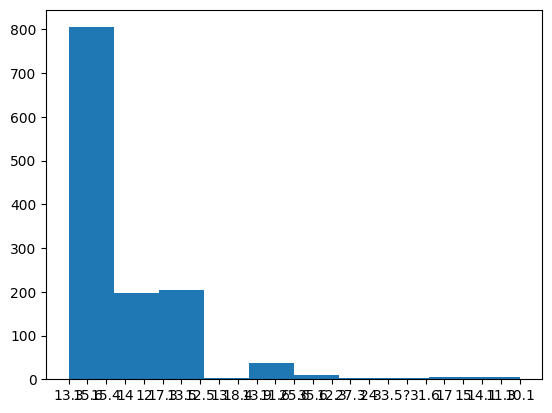

In [38]:
plt.hist(data["Inches"])  

In [39]:
data["Inches"].value_counts().index

Index(['15.6', '14', '17.3', '13.3', '12.5', '11.6', '12', '13.9', '13.5',
       '12.3', '15.4', '15', '10.1', '35.6', '13', '24', '18.4', '27.3',
       '25.6', '33.5', '?', '17', '31.6', '14.1', '11.3'],
      dtype='object', name='Inches')

In [40]:
data["Inches"].replace( to_replace="?",value = data["Inches"].value_counts().index[0],inplace=True)

/tmp/ipykernel_7483/2151212375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Inches"].replace( to_replace="?",value = data["Inches"].value_counts().index[0],inplace=True)


In [41]:
data[data["Inches"] == "?"] 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [42]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8.0,14,80,8,1.37,71378.6832
1,13,3,13.3,13,64,8.0,13,45,8,1.34,47895.5232
2,5,1,15.6,15,58,8.0,21,54,2,1.86,30636.0000
3,13,3,15.4,36,111,16.0,31,95,8,1.83,135195.3360
4,13,3,13.3,26,99,8.0,21,84,8,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4.0,14,47,4,1.80,33992.6400
1299,6,2,13.3,22,77,16.0,31,47,4,1.30,79866.7200
1300,6,1,14,4,16,2.0,6,6,4,1.50,12201.1200
1301,5,1,15.6,4,77,6.0,12,32,4,2.19,40705.9200


In [43]:
data.corr()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
Company,1.000000,0.380398,0.059002,0.194159,0.363425,0.283860,0.311777,0.346185,0.137692,0.039195,0.350961
TypeName,0.380398,1.000000,0.082796,0.416455,0.613583,0.482078,0.512757,0.625847,0.176514,0.219859,0.613227
Inches,0.059002,0.082796,1.000000,-0.005783,0.116455,0.142117,0.055354,0.156538,-0.018268,0.494578,0.044966
ScreenResolution,0.194159,0.416455,-0.005783,1.000000,0.582766,0.467758,0.607716,0.509944,0.203694,0.000384,0.634255
Cpu,0.363425,0.613583,0.116455,0.582766,1.000000,0.584492,0.687107,0.789954,0.270039,0.221939,0.751137
Ram,0.283860,0.482078,0.142117,0.467758,0.584492,1.000000,0.630931,0.531770,0.095454,0.283289,0.685648
Memory,0.311777,0.512757,0.055354,0.607716,0.687107,0.630931,1.000000,0.607171,0.225467,0.126544,0.727390
Gpu,0.346185,0.625847,0.156538,0.509944,0.789954,0.531770,0.607171,1.000000,0.249474,0.260686,0.732674
OpSys,0.137692,0.176514,-0.018268,0.203694,0.270039,0.095454,0.225467,0.249474,1.000000,-0.045465,0.295170
Weight,0.039195,0.219859,0.494578,0.000384,0.221939,0.283289,0.126544,0.260686,-0.045465,1.000000,0.175966


In [44]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [45]:

data.shape

(1244, 11)

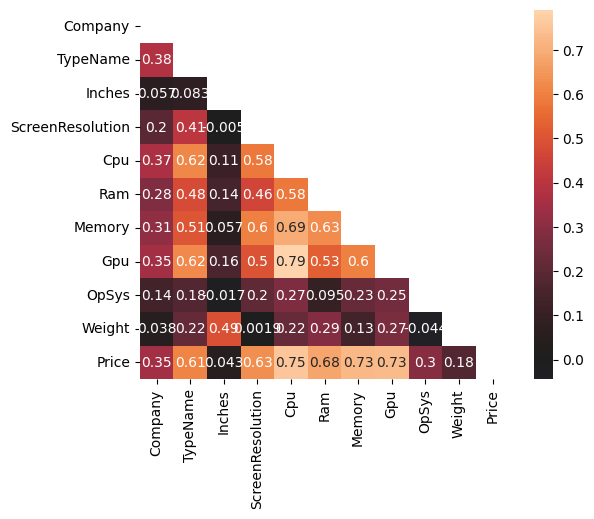

In [46]:

data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()              # for visualise co relation matrix

In [47]:
#selected_features = list(data_corr[data_corr[data.columns[-1]] > 0.5].index)

In [48]:

(data.corr().loc["Price"] > 0.5) #loc is used instead of iloc because this time as an input we are not giving integers(we are accesing columns and rows by their names)

Company             False
TypeName             True
Inches              False
ScreenResolution     True
Cpu                  True
Ram                  True
Memory               True
Gpu                  True
OpSys               False
Weight              False
Price                True
Name: Price, dtype: bool

In [49]:
##selected_features= list(data_corr[data_corr])

In [50]:
selected_features = ["TypeName","ScreenResolution","Cpu","Ram","Memory","Gpu","Price"]

In [51]:
refined_data = data[selected_features]

In [52]:
refined_data

,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,Price
0,3,26,85,8.0,14,80,71378.6832
1,3,13,64,8.0,13,45,47895.5232
2,1,15,58,8.0,21,54,30636.0000
3,3,36,111,16.0,31,95,135195.3360
4,3,26,99,8.0,21,84,96095.8080
...,...,...,...,...,...,...,...
1239,1,4,77,4.0,9,29,38378.6496
1240,2,16,77,4.0,14,47,33992.6400
1241,2,22,77,16.0,31,47,79866.7200
1242,1,4,16,2.0,6,6,12201.1200


In [53]:
X_transpose = np.array(refined_data.iloc[:,0:6])
Y = np.array(refined_data.iloc[:,-1]).reshape(refined_data.shape[0],1)

In [54]:
def engineered_feaures(X_transpose,features_degree,is_only_interaction):

    nth_degree_feature_engineer = PolynomialFeatures(degree=features_degree,interaction_only=is_only_interaction)
    X_transpose_engineered = nth_degree_feature_engineer.fit_transform(X_transpose)

    return X_transpose_engineered

In [55]:
def normalize_data(X_transpose):

    zero_mean_one_std_scaler = StandardScaler()
    X_bar_transpose = zero_mean_one_std_scaler.fit_transform(X_transpose)

    return X_bar_transpose

In [56]:
def train_cv_test_split(X_transpose, y, train_frac, cv_frac):

    X_train_transpose = X_transpose[0:int(train_frac*X_transpose.shape[0])]
    y_train = y[0:int(train_frac*y.shape[0])]

    X_cv_transpose = X_transpose[int(train_frac*X_transpose.shape[0]):int((train_frac+cv_frac)*X_transpose.shape[0])]
    y_cv = y[int(train_frac*y.shape[0]):int(train_frac+cv_frac*y.shape[0])]

    X_test_transpose = X_transpose[int((train_frac+cv_frac)*X_transpose.shape[0]):]
    y_test = y[int((train_frac+cv_frac)*y.shape[0]):]

    return (X_train_transpose,y_train), (X_cv_transpose,y_cv), (X_test_transpose,y_test)

(array([438., 435., 225.,  95.,  36.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

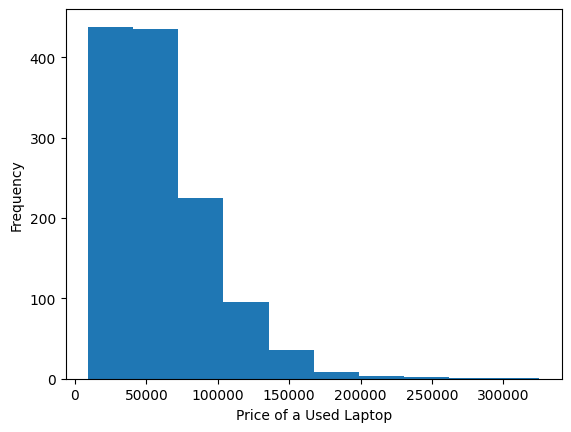

In [57]:
plt.xlabel("Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(Y)

/tmp/ipykernel_7483/1335220404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,fit=s.norm)      #fitted best fit of normal dist


<Axes: xlabel='Price of a Used Laptop', ylabel='Density'>

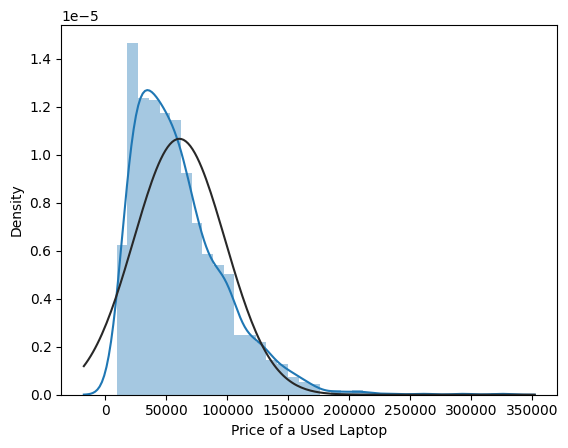

In [58]:
plt.xlabel("Price of a Used Laptop")
sns.distplot(Y,fit=s.norm)      #fitted best fit of normal dist

(array([ 14.,  72., 142., 178., 249., 263., 208.,  97.,  17.,   4.]),
 array([ 9.13461633,  9.49029881,  9.84598129, 10.20166377, 10.55734625,
        10.91302873, 11.26871121, 11.62439369, 11.98007617, 12.33575865,
        12.69144113]),
 <BarContainer object of 10 artists>)

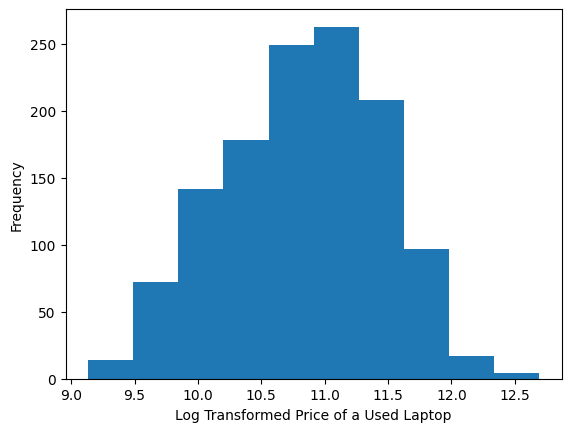

In [59]:
plt.xlabel("Log Transformed Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(np.log(Y))         #make dist normal

/tmp/ipykernel_7483/1176846366.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(Y),fit=s.norm)


<Axes: xlabel='Log Transformed Price of a Used Laptop', ylabel='Density'>

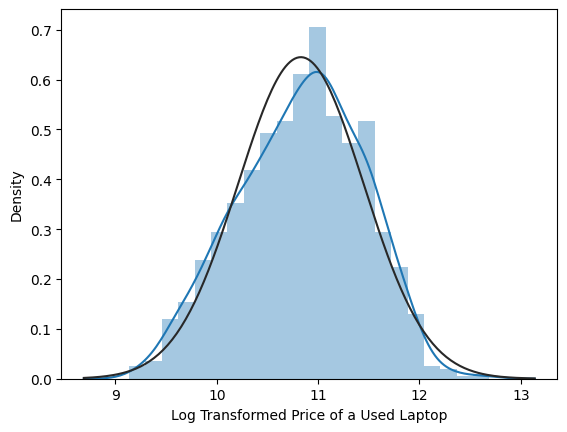

In [60]:

plt.xlabel("Log Transformed Price of a Used Laptop")
sns.distplot(np.log(Y),fit=s.norm)

In [61]:
Y = np.log(Y)

In [62]:
X_transpose_engineered = engineered_feaures(X_transpose,2,False)
X_bar_transpose = normalize_data(X_transpose_engineered)
(X_train_transpose,Y_train), (X_cv_transpose,y_cv), (X_test_transpose,y_test) = train_cv_test_split(X_bar_transpose, Y, 0.7, 0.2)

In [63]:
def mse(theta0,theta):
    return np.mean((Y - (theta0 + np.matmul(X_transpose,theta)))**2)

In [64]:

def del_mse_by_del_theta(theta0,theta):

    error_transpose = np.transpose((theta0 + np.matmul(X_transpose,theta) - Y))

    del_by_del_theta0 = np.mean(error_transpose)
    del_by_del_theta = (1/Y.shape[0])*np.transpose(np.matmul(error_transpose,X_transpose))

    return [del_by_del_theta0,del_by_del_theta]    

In [70]:
def training(epsilon = 10**(-4),epoch_counter = 0, theta0_initial = 0,theta_initial = np.zeros((X_transpose.shape[1],1)),tol = 10**(-5)):


    while True:

        initial_gradients = del_mse_by_del_theta(theta0_initial,theta_initial)

        theta0_final = theta0_initial - (epsilon * initial_gradients[0])
        theta_final = theta_initial - (epsilon * initial_gradients[1])

        mse_initial_value = mse(theta0_initial,theta_initial)
        mse_final_value = mse(theta0_final,theta_final)

        if abs(mse_initial_value - mse_final_value) < tol:
            break

        epoch_counter += 1

        theta0_initial = theta0_final
        theta_initial = theta_final

        print("Epoch # {}, MSE Value = {}".format(epoch_counter,mse_initial_value))
        
    return [theta0_final, theta_final]

In [71]:
def save_model(params, file_name = "Saved model.pkl"):
    
    pickle.dump(obj = params, file=file_name)

In [72]:
def load_model(file_name =  "Saved model.pkl"):
    
    with open(file_name, "rb") as file_handle:
        params = pickle.load(file_handle)
    return params

In [74]:
#np.savez_compressed("learned_params.npz",theta0_final,theta_final)